##### import libraries

In [117]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

##### loading the clean dataset

In [118]:
energy_data = pd.read_csv(r"C:\Users\steph\Downloads\AMDARI\Energy Market Resilience Metrics\historical_energy_data.csv")

In [119]:
infrastructure_data = pd.read_csv(r"C:\Users\steph\Downloads\AMDARI\Energy Market Resilience Metrics\infrastructure_data.csv")

In [120]:
market_data = pd.read_csv(r"C:\Users\steph\Downloads\AMDARI\Energy Market Resilience Metrics\market_data.csv")

In [121]:
regulatory_data = pd.read_csv(r"C:\Users\steph\Downloads\AMDARI\Energy Market Resilience Metrics\regulatory_data.csv")

##### view headshot of imported dataset

In [122]:
energy_data.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,01/01/2012,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,02/01/2012,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,03/01/2012,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,04/01/2012,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,05/01/2012,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548


In [123]:
infrastructure_data.head()

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,01/01/2012,Poor,Repairs,High
1,02/01/2012,Poor,Upgrades,High
2,03/01/2012,Fair,Upgrades,High
3,04/01/2012,Poor,Repairs,High
4,05/01/2012,Poor,Repairs,High


In [124]:
market_data.head()

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115
2,2012-01-03,0.241443,High,Stable,22353
3,2012-01-04,0.071104,Low,Downward,25482
4,2012-01-05,0.107281,High,Stable,20264


#### A little observation here
the format of the date in the market data is not the same in the infrastructure and energy tables. For consistency's sake, I should let the date column in market data have the same format in the others

In [125]:
regulatory_data.head()

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,1/1/2012,New Regulation,Compliant,3281.685306
1,1/2/2012,Amendment,Non-compliant,2037.272281
2,1/3/2012,Amendment,Non-compliant,629.891778
3,1/4/2012,New Regulation,Non-compliant,2277.898351
4,1/5/2012,Amendment,Non-compliant,4687.163688


##### Looking for missing values in the data

In [126]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date/Time        1000 non-null   object 
 1   Market Price     1000 non-null   float64
 2   Competitor Data  1000 non-null   object 
 3   Market Trends    1000 non-null   object 
 4   Market Demand    1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


the date time column should have datetime as datatype

In [127]:
#updating the date/time datatype
market_data['Date/Time'] = pd.to_datetime(market_data['Date/Time'])

# Verify the change
print(market_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date/Time        1000 non-null   datetime64[ns]
 1   Market Price     1000 non-null   float64       
 2   Competitor Data  1000 non-null   object        
 3   Market Trends    1000 non-null   object        
 4   Market Demand    1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB
None


In [128]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date/Time                 1000 non-null   object 
 1   Location/Region           1000 non-null   object 
 2   Energy Source             1000 non-null   object 
 3   Energy Demand             1000 non-null   int64  
 4   Energy Consumption (kWh)  1000 non-null   int64  
 5   Energy Price              1000 non-null   float64
 6   Operational Costs         1000 non-null   float64
 7   Energy Production (kWh)   1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [129]:
#update the date/time data type
energy_data['Date/Time'] = pd.to_datetime(market_data['Date/Time'])
print(energy_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date/Time                 1000 non-null   datetime64[ns]
 1   Location/Region           1000 non-null   object        
 2   Energy Source             1000 non-null   object        
 3   Energy Demand             1000 non-null   int64         
 4   Energy Consumption (kWh)  1000 non-null   int64         
 5   Energy Price              1000 non-null   float64       
 6   Operational Costs         1000 non-null   float64       
 7   Energy Production (kWh)   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 62.6+ KB
None


In [130]:
regulatory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           1000 non-null   object 
 1   Regulatory Changes  1000 non-null   object 
 2   Compliance Status   1000 non-null   object 
 3   Compliance Costs    1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [131]:
#update date/time datatype
regulatory_data['Date/Time'] = pd.to_datetime(regulatory_data['Date/Time'])

regulatory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           1000 non-null   datetime64[ns]
 1   Regulatory Changes  1000 non-null   object        
 2   Compliance Status   1000 non-null   object        
 3   Compliance Costs    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 31.4+ KB


In [132]:
infrastructure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date/Time               1000 non-null   object
 1   Infrastructure Status   1000 non-null   object
 2   Maintenance Activities  1000 non-null   object
 3   Technology Limitations  987 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [133]:
infrastructure_data['Date/Time'] = pd.to_datetime(infrastructure_data['Date/Time'], dayfirst=True)

# Verify the change
print(infrastructure_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date/Time               1000 non-null   datetime64[ns]
 1   Infrastructure Status   1000 non-null   object        
 2   Maintenance Activities  1000 non-null   object        
 3   Technology Limitations  987 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 31.4+ KB
None


##### checking if the date/time call in all the files have the same format if dd/mm/yyyy

In [134]:
print(energy_data['Date/Time'].head())

0   2012-01-01
1   2012-01-02
2   2012-01-03
3   2012-01-04
4   2012-01-05
Name: Date/Time, dtype: datetime64[ns]


In [135]:
print(market_data['Date/Time'].head())

0   2012-01-01
1   2012-01-02
2   2012-01-03
3   2012-01-04
4   2012-01-05
Name: Date/Time, dtype: datetime64[ns]


In [136]:
print(infrastructure_data['Date/Time'].head())

0   2012-01-01
1   2012-01-02
2   2012-01-03
3   2012-01-04
4   2012-01-05
Name: Date/Time, dtype: datetime64[ns]


In [137]:
regulatory_data['Date/Time'].head()

0   2012-01-01
1   2012-01-02
2   2012-01-03
3   2012-01-04
4   2012-01-05
Name: Date/Time, dtype: datetime64[ns]

##### Verifying that all date/time columns are consistent in all datasets

In [138]:
energy_data.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,2012-01-03,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,2012-01-04,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,2012-01-05,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548


In [139]:
market_data.head()

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115
2,2012-01-03,0.241443,High,Stable,22353
3,2012-01-04,0.071104,Low,Downward,25482
4,2012-01-05,0.107281,High,Stable,20264


In [140]:
infrastructure_data.head()

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,2012-01-01,Poor,Repairs,High
1,2012-01-02,Poor,Upgrades,High
2,2012-01-03,Fair,Upgrades,High
3,2012-01-04,Poor,Repairs,High
4,2012-01-05,Poor,Repairs,High


In [141]:
regulatory_data.head()

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306
1,2012-01-02,Amendment,Non-compliant,2037.272281
2,2012-01-03,Amendment,Non-compliant,629.891778
3,2012-01-04,New Regulation,Non-compliant,2277.898351
4,2012-01-05,Amendment,Non-compliant,4687.163688


##### checking for descriptive statistics

In [142]:
energy_data.describe(include='all')

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
count,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN
top,NaN,Region C,Fossil Fuels,NaN,NaN,NaN,NaN,NaN
freq,NaN,362,507,NaN,NaN,NaN,NaN,NaN
mean,2013-05-14 12:00:00,NaN,NaN,49336.335000,24249.533000,0.126752,3002.452425,25502.488000
min,2012-01-01 00:00:00,NaN,NaN,1015.000000,505.000000,0.050368,1000.630978,850.000000
25%,2012-09-06 18:00:00,NaN,NaN,25812.750000,12017.750000,0.091048,1957.452731,13235.750000
50%,2013-05-14 12:00:00,NaN,NaN,49398.500000,23178.000000,0.126799,2954.748776,24946.000000
75%,2014-01-19 06:00:00,NaN,NaN,73877.500000,36563.000000,0.163701,4095.759662,37653.250000
max,2014-09-26 00:00:00,NaN,NaN,99941.000000,49985.000000,0.199951,4995.000138,49936.000000


In [143]:
market_data.describe(include='all')

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
count,1000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,3,3,NaN
top,NaN,NaN,Low,Upward,NaN
freq,NaN,NaN,351,343,NaN
mean,2013-05-14 12:00:00,0.139154,NaN,NaN,25392.807000
min,2012-01-01 00:00:00,0.030053,NaN,NaN,836.000000
25%,2012-09-06 18:00:00,0.084488,NaN,NaN,13515.250000
50%,2013-05-14 12:00:00,0.138719,NaN,NaN,24910.500000
75%,2014-01-19 06:00:00,0.192279,NaN,NaN,37102.750000
max,2014-09-26 00:00:00,0.249960,NaN,NaN,49941.000000


In [144]:
infrastructure_data.describe(include='all')

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
count,1000,1000,1000,987
unique,NaN,3,3,3
top,NaN,Poor,Routine Maintenance,High
freq,NaN,641,360,776
mean,2013-05-14 12:00:00,NaN,NaN,NaN
min,2012-01-01 00:00:00,NaN,NaN,NaN
25%,2012-09-06 18:00:00,NaN,NaN,NaN
50%,2013-05-14 12:00:00,NaN,NaN,NaN
75%,2014-01-19 06:00:00,NaN,NaN,NaN
max,2014-09-26 00:00:00,NaN,NaN,NaN


In [145]:
regulatory_data.describe(include='all')

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
count,1000,1000,1000,1000.000000
unique,NaN,3,2,NaN
top,NaN,New Regulation,Non-compliant,NaN
freq,NaN,364,515,NaN
mean,2013-05-14 12:00:00,NaN,NaN,2841.451262
min,2012-01-01 00:00:00,NaN,NaN,503.841638
25%,2012-09-06 18:00:00,NaN,NaN,1778.330823
50%,2013-05-14 12:00:00,NaN,NaN,2906.980088
75%,2014-01-19 06:00:00,NaN,NaN,3892.981360
max,2014-09-26 00:00:00,NaN,NaN,4987.232664


#### EDA- Investigating the categorical columns

In [146]:
# in regulatory_data, we have regulatory changes and compliance status
# in infrastructure_data, we have infrastructure status and maintenance activities
# in market_data, we have Competitor Data and	Market Trends
# in energy data, we have Location/Region and Energy Source

In [147]:
#grouping dataset as dataset

In [148]:
datasets = {
    "energy_data": energy_data,
    "market_data": market_data,
    "infrastructure_data": infrastructure_data,
    "regulatory_data": regulatory_data
}

In [149]:
# extracting uniquw values and their counts for categorical columns

In [150]:
categorical_columns = {
    "energy_data": ['Location/Region' ,'Energy Source'],
    "market_data": ['Competitor Data' ,'Market Trends'],
    "infrastructure_data": ['Infrastructure Status', 'Maintenance Activities', 'Technology Limitations'],
    "regulatory_data":['Regulatory Changes', 'Compliance Status']
}

In [151]:
#count the values for each column

In [152]:
categorical_values_counts = {}
for dataset, columns in categorical_columns.items():
    for column in columns:
        categorical_values_counts[(dataset, column)] = datasets[dataset][column].value_counts()

In [153]:
#visualusing the categorical data against their counts

In [154]:
#calculate the number of rows and columns for the subplots

In [155]:
num_rows = (len(categorical_values_counts) +1) // 2
num_cols = 2

In [156]:
#create a grid of the subplots

In [157]:
import pandas as pd

# Create DataFrames for each categorical feature
for (dataset, column), counts in categorical_values_counts.items():
    df = pd.DataFrame(counts).reset_index()
    df.columns = [column, 'Count']
    print(f"\n{dataset} - {column} Counts:")
    print(df)



energy_data - Location/Region Counts:
  Location/Region  Count
0        Region C    362
1        Region A    325
2        Region B    313

energy_data - Energy Source Counts:
  Energy Source  Count
0  Fossil Fuels    507
1    Renewables    493

market_data - Competitor Data Counts:
  Competitor Data  Count
0             Low    351
1            High    326
2          Medium    323

market_data - Market Trends Counts:
  Market Trends  Count
0        Upward    343
1      Downward    329
2        Stable    328

infrastructure_data - Infrastructure Status Counts:
  Infrastructure Status  Count
0                  Poor    641
1                  Fair    322
2                  Good     37

infrastructure_data - Maintenance Activities Counts:
  Maintenance Activities  Count
0    Routine Maintenance    360
1               Upgrades    327
2                Repairs    313

infrastructure_data - Technology Limitations Counts:
  Technology Limitations  Count
0                   High    776
1         

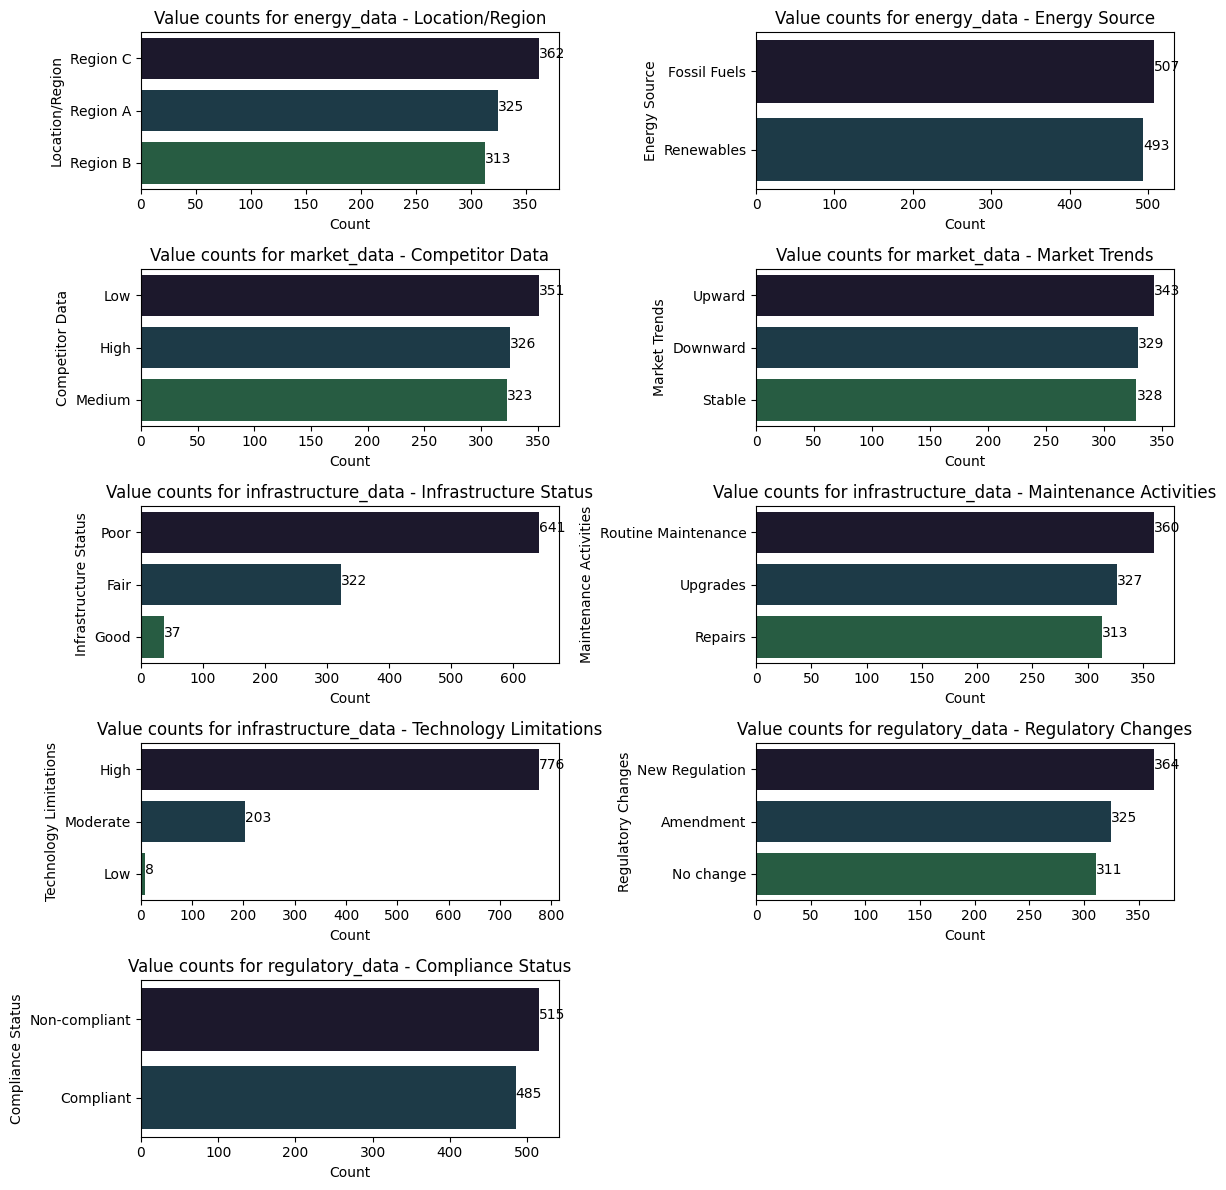

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a different color palette
palette = sns.color_palette("cubehelix", len(categorical_values_counts))

num_rows = (len(categorical_values_counts) + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through categorical columns and plot them in subplots
for i, ((dataset, column), counts) in enumerate(categorical_values_counts.items()):
    ax = axes[i]
    sns.barplot(x=counts.values, y=counts.index, ax=ax, hue=counts.index, palette=palette[:len(counts)], dodge=False, legend=False)
    for j, value in enumerate(counts.values):
        ax.text(value, j, f'{value}', color='black', ha="left")
    ax.set_title(f"Value counts for {dataset} - {column}")
    ax.set_xlabel("Count")
    ax.set_ylabel(column)

# Hide any unused subplots
for idx in range(len(categorical_values_counts), len(axes)):
    fig.delaxes(axes[idx])


plt.savefig('Coloured Annotated Categorical columns vs Counts')
plt.tight_layout()
plt.show()


#### EDA- Demand, Production and Consumption
- Once there is a column with date information, it should occur to me that we can analyse one of the features overtime
- we'll start by examining the trends in enerby demand, production and concumption from the energy_data
- this will give us insights into fluctuations and potential vulnerabilities in the energy market


In [159]:
#extract the year, month from the date/time column

In [160]:
energy_data.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,2012-01-03,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,2012-01-04,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,2012-01-05,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548


In [161]:
energy_data['Year']=energy_data['Date/Time'].dt.year

In [162]:
energy_data['Month']=energy_data['Date/Time'].dt.month

In [163]:
# Convert Date/Time column to Year-Month period
energy_data['Year-Month'] = energy_data['Date/Time'].dt.to_period('M')

# Select only numeric columns for aggregation
numeric_columns = energy_data.select_dtypes(include=['number'])

# Add the 'Year-Month' column back to the numeric data
numeric_columns['Year-Month'] = energy_data['Year-Month']

# Group by Year-Month and calculate the mean
monthly_data = numeric_columns.groupby('Year-Month').mean()

print(monthly_data.head())


            Energy Demand  Energy Consumption (kWh)  Energy Price  \
Year-Month                                                          
2012-01      51746.612903              28030.741935      0.135257   
2012-02      58542.068966              22298.310345      0.131823   
2012-03      51976.903226              25060.096774      0.129830   
2012-04      45590.000000              28423.733333      0.133459   
2012-05      52512.258065              22419.709677      0.135185   

            Operational Costs  Energy Production (kWh)    Year  Month  
Year-Month                                                             
2012-01           3171.837291             28536.064516  2012.0    1.0  
2012-02           3040.184202             22991.448276  2012.0    2.0  
2012-03           3252.204930             24378.741935  2012.0    3.0  
2012-04           2797.131934             27881.266667  2012.0    4.0  
2012-05           3274.751558             23105.903226  2012.0    5.0  


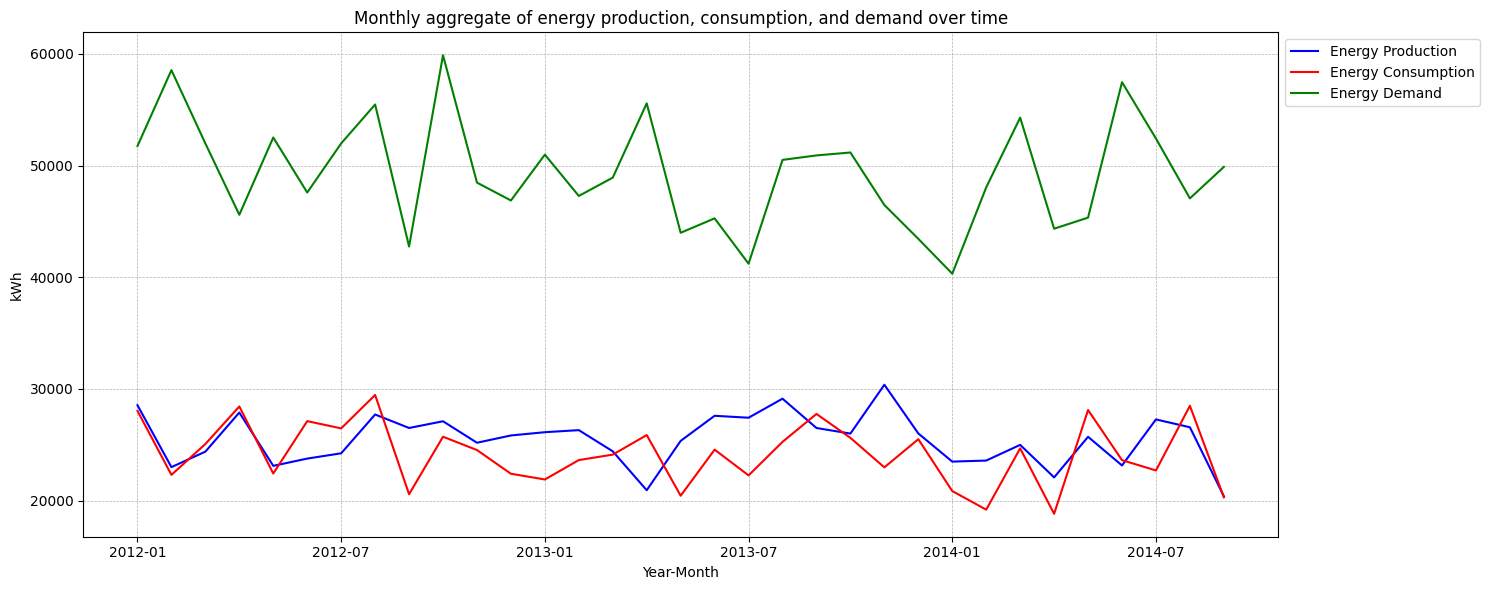

In [164]:
# Assuming monthly_data has already been prepared as shown before
plt.figure(figsize=(15,6))

sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Production (kWh)', label='Energy Production', color='blue', linestyle='-', linewidth=1.5, errorbar=None)
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Consumption (kWh)', label='Energy Consumption', color='red', linestyle='-', linewidth=1.5, errorbar=None)
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Demand', label='Energy Demand', color='green', linestyle='-', linewidth=1.5, errorbar=None)

plt.xlabel('Year-Month')
plt.ylabel('kWh')
plt.title('Monthly aggregate of energy production, consumption, and demand over time')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

labels = monthly_data.index.astype(str).tolist()
n = 6
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.savefig('Time series')
plt.show()



##### Insights

Energy Production vs. Energy Consumption:

General Trend: Energy production (blue line) and energy consumption (red line) generally follow similar trends over time, with production slightly higher than consumption in most months. This indicates that the energy produced is generally sufficient to meet consumption needs.
Fluctuations: Both production and consumption show periodic fluctuations, with some months experiencing higher production and consumption levels than others. These fluctuations might be due to seasonal variations, changes in industrial activity, or other factors affecting energy demand and supply.

Energy Demand:
Higher Levels: Energy demand (green line) is significantly higher than both production and consumption throughout the period. This discrepancy suggests that the current energy production is not sufficient to meet the overall energy demand, indicating a potential need for increased production capacity or improved energy efficiency measures.
Seasonal Patterns: The energy demand line shows clear peaks and troughs, which might correlate with specific seasons or periods of high energy usage. Identifying the causes of these peaks could help in planning for future energy needs.

Monthly Variations:
2012-01 to 2014-07: Over the observed period, energy demand remains relatively high with noticeable peaks around mid-2012, early 2013, and mid-2014. Production and consumption also show peaks, but they are less pronounced compared to demand.
Production and Consumption Correlation: There is a strong correlation between production and consumption patterns, indicating that production levels are adjusted to meet consumption needs. However, since demand consistently exceeds both, there might be a need for better demand management or additional production resources.

Areas for Further Analysis:
Seasonal Effects: Analyzing the data for seasonal effects could provide more insights into why certain periods have higher energy demand.
Peak Demand Periods: Investigating the specific causes of peak demand periods could help in developing strategies to manage these peaks more effectively.
Energy Efficiency: Exploring the potential for energy efficiency improvements could help in bridging the gap between energy demand and supply.
Recommendations:
Increase Production Capacity: To meet the high energy demand, consider investing in new energy production facilities or upgrading existing ones.
Improve Energy Efficiency: Implementing energy efficiency measures can help reduce overall energy consumption and make better use of the produced energy.
Demand Management: Develop strategies to manage peak energy demand, such as demand response programs, to ensure a more balanced and reliable energy supply.
Renewable Energy Integration: Explore integrating more renewable energy sources to diversify the energy mix and reduce dependency on fossil fuels, which can also help in meeting environmental regulations.

##### EDA - Energy Price and Market Price
- to understand the pricing dynamics and it's relation to market trends
- visualisation of market price ffrom the market_data datasets along side the energy price from the energy dataset over time

In [165]:
#merge energy and market data on Date/time for combined analysis

In [169]:
energy_data.columns

Index(['Date/Time', 'Location/Region', 'Energy Source', 'Energy Demand',
       'Energy Consumption (kWh)', 'Energy Price', 'Operational Costs',
       'Energy Production (kWh)', 'Year', 'Month', 'Year-Month'],
      dtype='object')

In [170]:
market_data.columns

Index(['Date/Time', 'Market Price', 'Competitor Data', 'Market Trends',
       'Market Demand'],
      dtype='object')

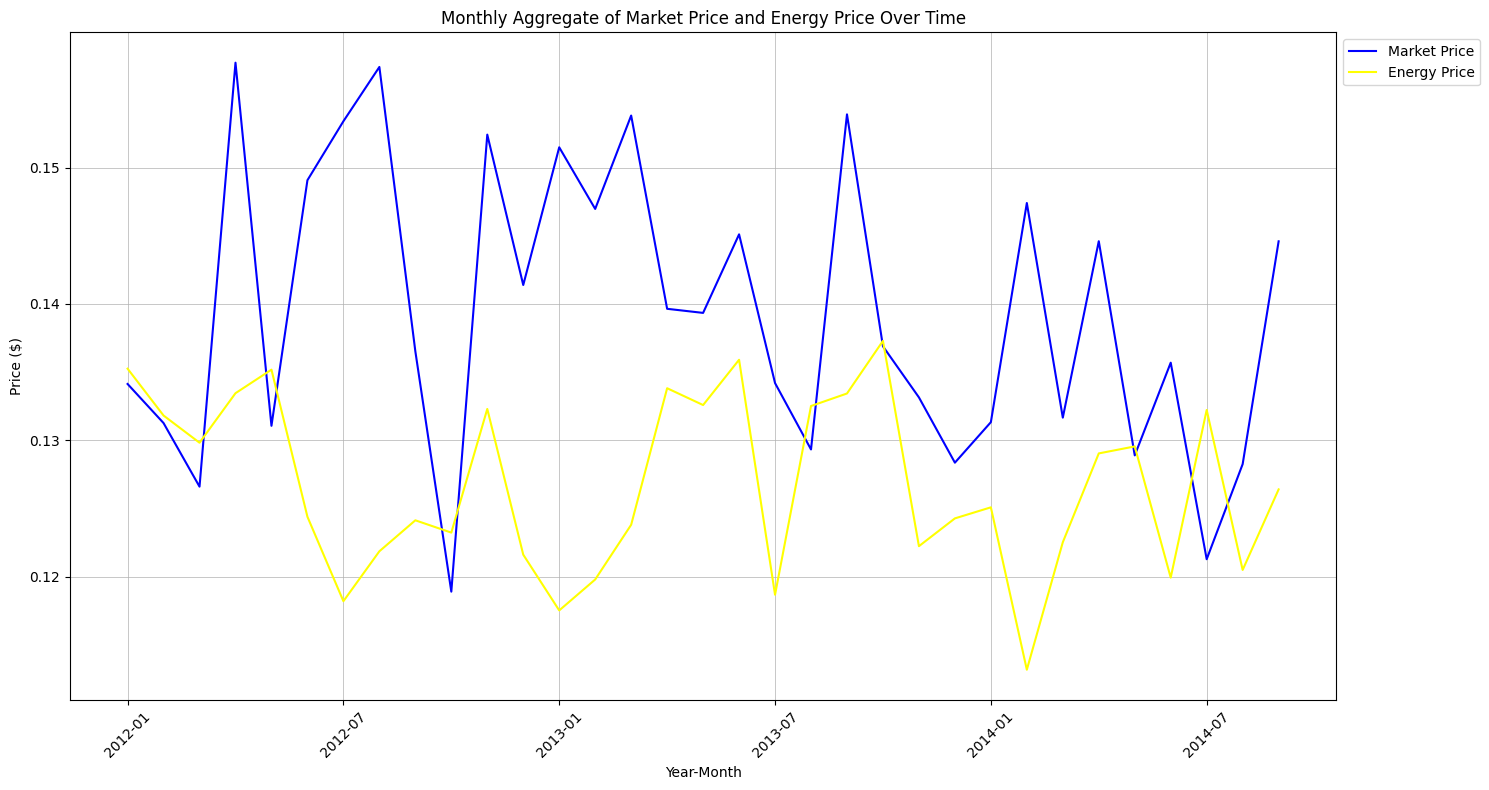

In [186]:
# Merge the data on 'Date/Time'
merged_data = pd.merge(energy_data, market_data, on='Date/Time', how='inner')

# Create 'Year-Month' column for aggregation
merged_data['Year-Month'] = merged_data['Date/Time'].dt.to_period('M')

# Aggregate data on a monthly basis
monthly_merged_data = merged_data.groupby('Year-Month')[['Market Price', 'Energy Price']].mean().reset_index()

# Convert 'Year-Month' back to string for plotting
monthly_merged_data['Year-Month'] = monthly_merged_data['Year-Month'].astype(str)

# Plotting
plt.figure(figsize=(15, 8))

sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Market Price', label='Market Price', color='blue', linestyle='-', linewidth=1.5)
sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Energy Price', label='Energy Price', color='yellow', linestyle='-', linewidth=1.5)

plt.title('Monthly Aggregate of Market Price and Energy Price Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Price ($)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
labels = monthly_merged_data['Year-Month'].tolist()
n = 6
plt.xticks(labels[::n], rotation=45)
plt.tight_layout()

plt.savefig('Monthly Aggregate of Market Price and Energy Price Over Time')

plt.show()


##### Insights

The plot looks great, showing the monthly aggregate of Market Price and Energy Price over time. Here are some insights you can derive from this visualization:

Trend Analysis:

Market Price: The blue line shows the fluctuations in the market price. It has some noticeable spikes and dips, indicating periods of high and low market prices. The trend seems to vary significantly over time.
Energy Price: The yellow line represents the energy price. While it also shows fluctuations, the variations seem less extreme compared to the market price. There are periods where the energy price increases or decreases, but the overall changes are more moderate.
Comparison between Market Price and Energy Price:

There are periods where the market price and energy price move in similar directions, indicating a correlation between them. For example, both prices rise or fall around the same time.
However, there are also periods where the market price changes sharply while the energy price remains relatively stable, indicating that market dynamics have a more significant impact on the market price compared to the energy price.
Seasonal Patterns:

The plot does not show clear seasonal patterns, but you might observe some repeating trends that could be further investigated for seasonal effects.
Volatility:

The market price shows higher volatility with sharp peaks and troughs compared to the energy price. This could be due to various market factors affecting the price more dramatically.
Potential for Further Analysis:

Investigate the causes behind the sharp spikes and drops in the market price.
Explore if there are specific months or periods where the market price and energy price show a consistent relationship.
Consider analyzing other factors that might influence these prices, such as regulatory changes, competitor data, or market trends.
This plot provides a good starting point for further analysis and helps in understanding the dynamics between market price and energy price over time.

##### Correlation of demand with energy
check if the energy demand is influenced by the energy price

In [187]:
#merge energy and market data

In [190]:
merged_data = pd.merge(energy_data, market_data, on = 'Date/Time', how = 'inner')

correlation_energy_price = merged_data['Energy Demand'].corr(merged_data['Energy Price'])
correlation_market_price = merged_data['Market Demand'].corr(merged_data['Market Price'])

In [191]:
correlation_energy_price

np.float64(-0.005361840768503396)

In [192]:
correlation_market_price

np.float64(0.02980230214828854)

##### Insights

What It Means:
Energy Demand vs. Energy Price: The correlation of -0.005 implies that changes in energy demand have almost no effect on energy price. There is no significant linear relationship between these two variables in your dataset.
Market Demand vs. Market Price: The correlation of 0.030 implies that changes in market demand have almost no effect on market price. There is no significant linear relationship between these two variables in your dataset.
Implications:
Weak Correlation: Both correlations being close to zero suggest that there are likely other factors influencing energy and market prices that are not captured by demand alone. It indicates that demand is not a strong predictor of price in both cases.
Further Analysis Needed: To understand what drives energy and market prices, you may need to look at other variables and perform more comprehensive analyses, such as multivariate regression, to identify significant predictors.

In [193]:
correlation_energy_price2 = merged_data['Energy Price'].corr(merged_data['Energy Demand'])
correlation_market_price2 = merged_data['Market Price'].corr(merged_data['Market Demand'])

In [194]:
correlation_energy_price2

np.float64(-0.005361840768503396)

In [195]:
correlation_market_price2

np.float64(0.02980230214828854)

##### Energy Market Reslience Metrics

In [196]:
#check if the energy demand is influenced by the current energy price

In [197]:
energy_data.columns

Index(['Date/Time', 'Location/Region', 'Energy Source', 'Energy Demand',
       'Energy Consumption (kWh)', 'Energy Price', 'Operational Costs',
       'Energy Production (kWh)', 'Year', 'Month', 'Year-Month'],
      dtype='object')

In [198]:
merged_data = pd.merge(energy_data, market_data, on = 'Date/Time', how = 'inner')

correlation_energy_price = merged_data['Energy Demand'].corr(merged_data['Energy Price'])
correlation_market_price = merged_data['Market Demand'].corr(merged_data['Market Price'])

In [199]:
correlation_energy_price

np.float64(-0.005361840768503396)

In [200]:
correlation_market_price

np.float64(0.02980230214828854)

##### infrastructure status and tech limitations
- understand the state of infrastructure and technology over time.
- we'll visualise the frequency of various infrastructire status and the distribution of technology limitations from the infrastructure_data dataset

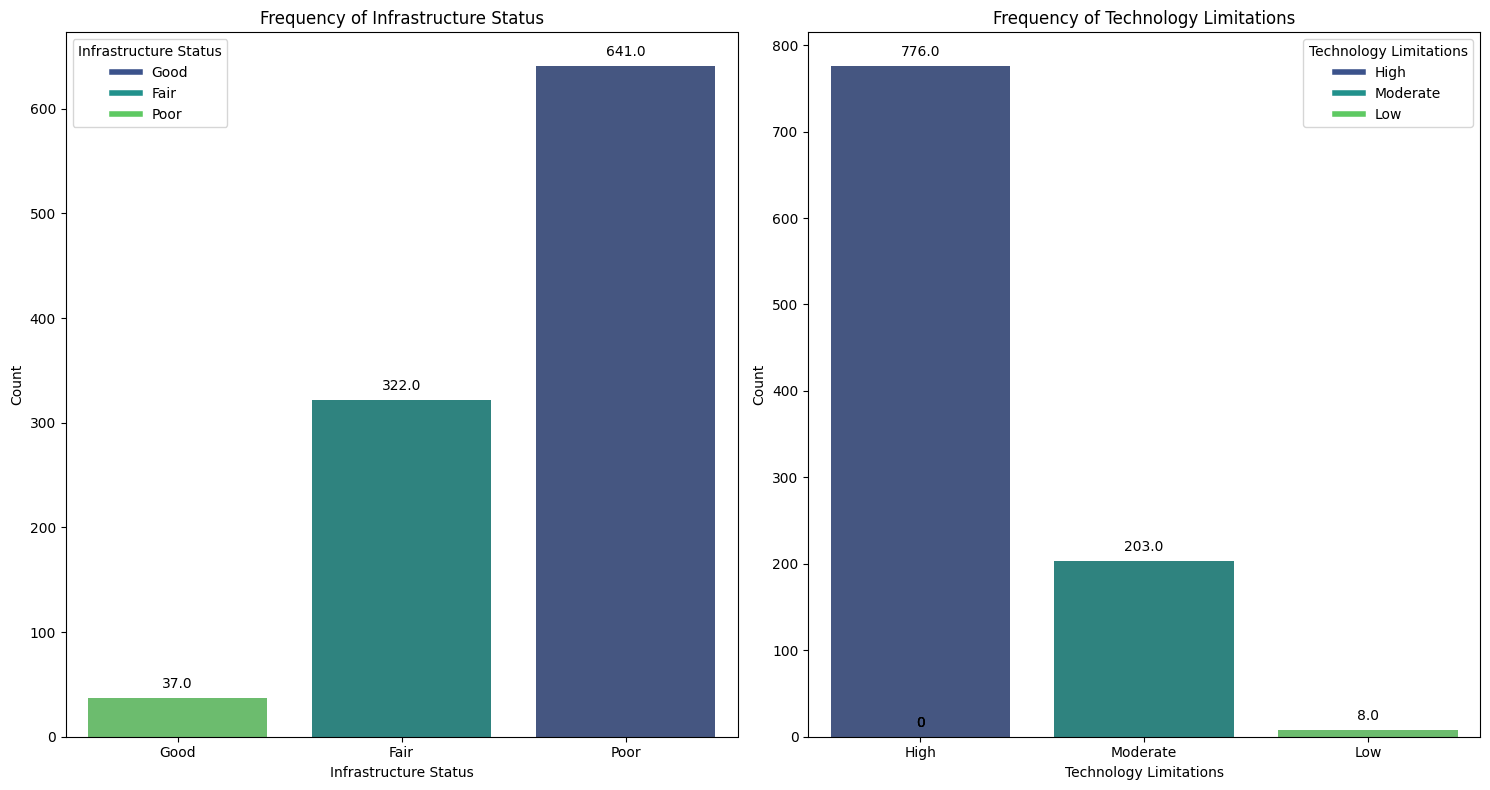

In [217]:
# Setting up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting the frequency of infrastructure status
sns.countplot(data=infrastructure_data, x='Infrastructure Status', ax=axes[0], order=['Good', 'Fair', 'Poor'], palette='viridis', hue='Infrastructure Status')
axes[0].set_title('Frequency of Infrastructure Status')
axes[0].set_xlabel('Infrastructure Status')
axes[0].set_ylabel('Count')

# Adding the counts on the bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plotting the frequency of technology limitations
sns.countplot(data=infrastructure_data, x='Technology Limitations', ax=axes[1], palette='viridis', hue='Technology Limitations')
axes[1].set_title('Frequency of Technology Limitations')
axes[1].set_xlabel('Technology Limitations')
axes[1].set_ylabel('Count')

# Adding the counts on the bars
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Manually adding legends
colors = sns.color_palette('viridis', 3)
legend_labels_infrastructure = ['Good', 'Fair', 'Poor']
legend_labels_technology = ['High', 'Moderate', 'Low']

custom_lines_infrastructure = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(legend_labels_infrastructure))]
custom_lines_technology = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(legend_labels_technology))]

axes[0].legend(custom_lines_infrastructure, legend_labels_infrastructure, title='Infrastructure Status')
axes[1].legend(custom_lines_technology, legend_labels_technology, title='Technology Limitations')

plt.savefig('infrastructure_data')
plt.tight_layout()
plt.show()



##### Insight

Frequency of Infrastructure Status
Good: There are very few instances of infrastructure being in 'Good' status. This indicates that the majority of the infrastructure is not in optimal condition.
Fair: A significant portion of the infrastructure is in 'Fair' condition. This suggests that while not optimal, a notable part of the infrastructure is functional but may require maintenance or upgrades soon.
Poor: The largest portion of the infrastructure is in 'Poor' condition. This is concerning as it suggests that a majority of the infrastructure may be at risk of failure or inefficiency, necessitating immediate attention and possible upgrades or replacements.
Frequency of Technology Limitations
High: Most of the technology limitations are rated as 'High'. This indicates that there are significant challenges and limitations posed by the existing technology, which could be hindering operational efficiency and increasing operational risks.
Moderate: A smaller, but still notable, portion of technology limitations are rated as 'Moderate'. These are challenges that are present but may not be as critical or urgent as those rated 'High'.
Low: Very few instances of technology limitations are rated as 'Low'. This suggests that there are minimal areas where technology is not posing a significant challenge.
Insights
Infrastructure Upgrades Needed: The high frequency of 'Fair' and 'Poor' infrastructure statuses indicates a need for significant infrastructure upgrades. This should be a priority to ensure operational efficiency and reduce risks of failure.
Addressing Technology Limitations: With most technology limitations rated as 'High', there's a clear need to invest in new technologies or improve existing ones. Addressing these limitations will likely result in better efficiency and productivity.
Prioritize High-Risk Areas: Both 'Poor' infrastructure and 'High' technology limitations should be prioritized. Focusing resources and efforts on these high-risk areas can help in achieving a more resilient and efficient operation.
These insights can help in making informed decisions regarding infrastructure improvements and technology upgrades, ensuring better performance and reliability.

##### Correlation between infrastructure status and tech limitation

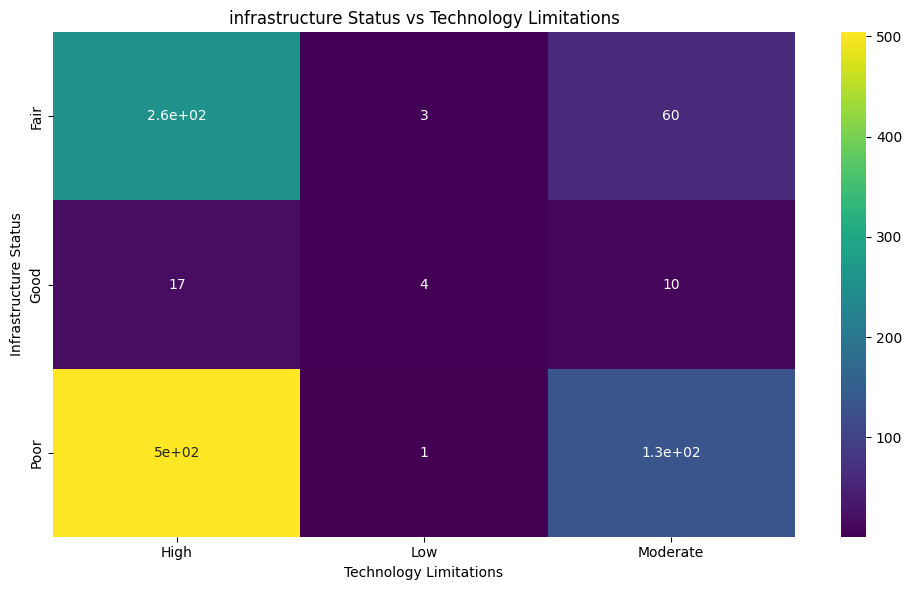

In [219]:
ct = pd.crosstab(infrastructure_data['Infrastructure Status'], infrastructure_data['Technology Limitations'])

plt.figure(figsize = (10,6))

sns.heatmap(ct, annot=True, cmap = 'viridis')
plt.title('infrastructure Status vs Technology Limitations')
plt.xlabel('Technology Limitations')
plt.ylabel('Infrastructure Status')
plt.savefig('infrastructure vs Technology Limitations')
plt.tight_layout()
plt.show()

##### correlation between poor infrastructure and high technology limitation and the energy production

In [225]:
energy_data.columns

Index(['Date/Time', 'Location/Region', 'Energy Source', 'Energy Demand',
       'Energy Consumption (kWh)', 'Energy Price', 'Operational Costs',
       'Energy Production (kWh)', 'Year', 'Month', 'Year-Month'],
      dtype='object')

In [227]:
infrastructure_data['Poor_infrastructure'] = infrastructure_data['Infrastructure Status'].apply(lambda x: 1 if x == 'Poor' else 0)
infrastructure_data['High_Tech_Limitations'] = infrastructure_data['Technology Limitations'].apply(lambda x: 1 if x == 'High' else 0)

infrastructure_data['Combined'] = infrastructure_data['Poor_infrastructure'] * infrastructure_data['High_Tech_Limitations']

merged_data = pd.merge(energy_data, infrastructure_data, on = 'Date/Time', how = 'inner')

correlation_coefficient = merged_data['Energy Production (kWh)'].corr(merged_data['Combined'])

print(correlation_coefficient)

-0.015877155348918315


##### Regulatory and compliance analysis
- visualise the frequency of various regulatory changes and the distribution of compliance costs with these changes from the regulatory_data 

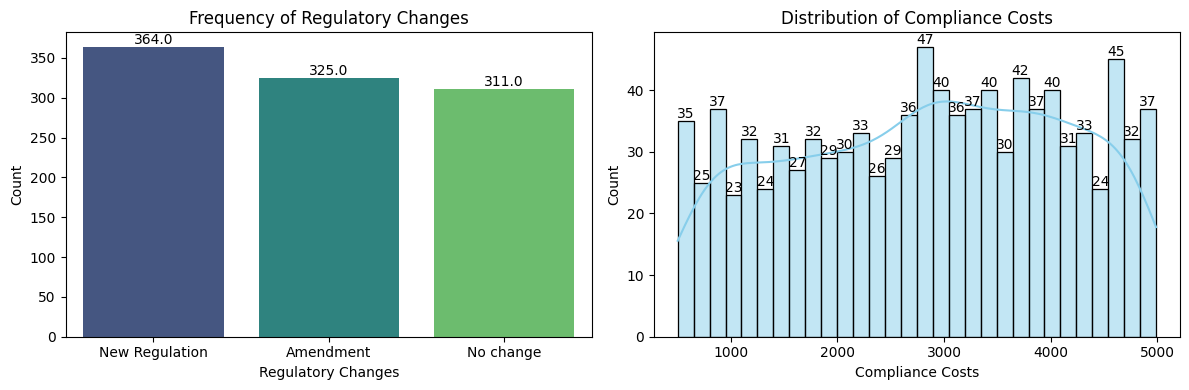

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Countplot with counts on the bars
sns.countplot(data=regulatory_data, x='Regulatory Changes', ax=ax1, palette='viridis', hue='Regulatory Changes')
ax1.set_title('Frequency of Regulatory Changes')
ax1.set_xlabel('Regulatory Changes')
ax1.set_ylabel('Count')

# Add counts on the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Histogram with the distribution of compliance costs
sns.histplot(data=regulatory_data, x='Compliance Costs', ax=ax2, bins=30, kde=True, color='skyblue')
ax2.set_title('Distribution of Compliance Costs')
ax2.set_xlabel('Compliance Costs')
ax2.set_ylabel('Count')

# Add counts on the histogram bars
for p in ax2.patches:
    if p.get_height() > 0:  # Only annotate non-zero bars
        height = int(p.get_height())
        ax2.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.savefig('Compliance cost and regulatory changes')
plt.tight_layout()
plt.show()


##### let's investigate impact of regulatory changes and operational costs

In [241]:
energy_data.columns

Index(['Date/Time', 'Location/Region', 'Energy Source', 'Energy Demand',
       'Energy Consumption (kWh)', 'Energy Price', 'Operational Costs',
       'Energy Production (kWh)', 'Year', 'Month', 'Year-Month'],
      dtype='object')

In [246]:
regulatory_data.columns

Index(['Date/Time', 'Regulatory Changes', 'Compliance Status',
       'Compliance Costs'],
      dtype='object')

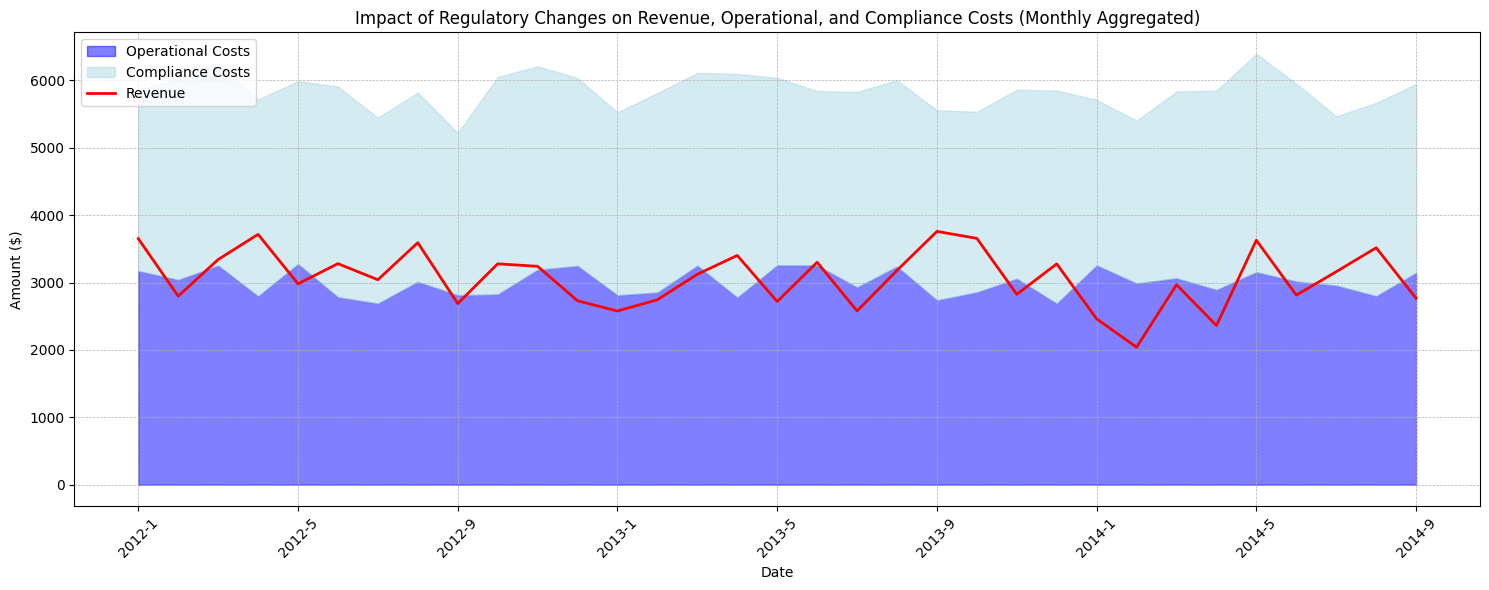

In [248]:
# Calculate revenue
energy_data['Revenue'] = energy_data['Energy Price'] * energy_data['Energy Consumption (kWh)']

# Merge data
merged_data = pd.merge(energy_data, regulatory_data, on='Date/Time', how='inner')

# Extract year and month for aggregation
merged_data['Year'] = merged_data['Date/Time'].dt.year
merged_data['Month'] = merged_data['Date/Time'].dt.month

# Select only numeric columns for aggregation
numeric_columns = ['Revenue', 'Operational Costs', 'Compliance Costs']

# Aggregate data on a monthly basis
monthly_aggregated_data = merged_data.groupby(['Year', 'Month'])[numeric_columns].mean().reset_index()

# Create a 'Year-Month' column for plotting
monthly_aggregated_data['Year-Month'] = monthly_aggregated_data['Year'].astype(str) + '-' + monthly_aggregated_data['Month'].astype(str)

# Plotting
plt.figure(figsize=(15, 6))

# Plot operational costs and compliance costs using fill_between for shaded areas
plt.fill_between(monthly_aggregated_data['Year-Month'], monthly_aggregated_data['Operational Costs'], color='blue', label='Operational Costs', alpha=0.5)
plt.fill_between(monthly_aggregated_data['Year-Month'], 
                 monthly_aggregated_data['Operational Costs'], 
                 monthly_aggregated_data['Operational Costs'] + monthly_aggregated_data['Compliance Costs'], 
                 color='lightblue', label='Compliance Costs', alpha=0.5)

# Plot revenue as a line plot
sns.lineplot(data=monthly_aggregated_data, x='Year-Month', y='Revenue', color='red', linewidth=2, label='Revenue')

# Adding titles and labels
plt.title('Impact of Regulatory Changes on Revenue, Operational, and Compliance Costs (Monthly Aggregated)')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
labels = monthly_aggregated_data['Year-Month'].tolist()
n = 4
plt.xticks(labels[::n], rotation=45)

plt.savefig('Impact of Regulatory Changes on Revenue, Operational, and Compliance Costs (Monthly Aggregated)')
# Adjust layout
plt.tight_layout()
plt.show()


##### analysing competition from renewable energy providers
analyse the energy source from the energy_data set
visualise the trends in energy production based on the energy socurce over time. this will give insights into how the production from renewables has evoled and potentially affected the companys's market share

In [ ]:
energy_data['Year'] = 

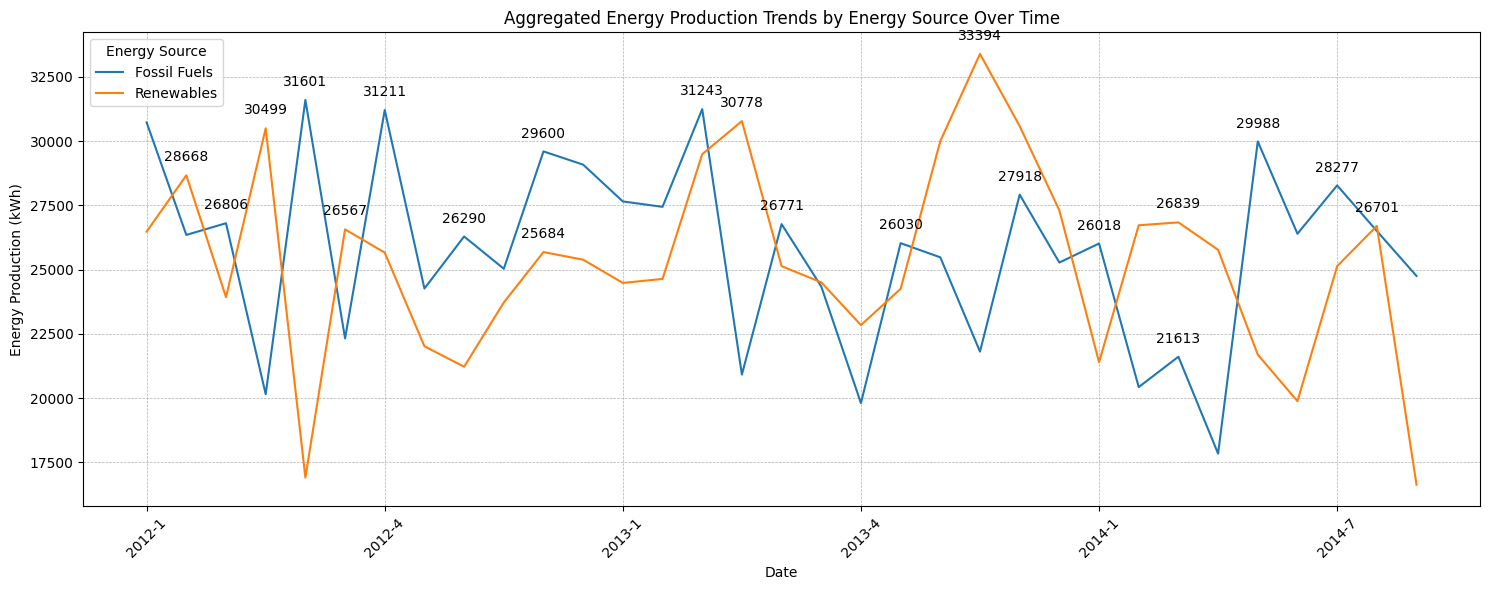

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume energy_data and regulatory_data are already loaded DataFrames

# Extract year and month for aggregation
energy_data['Year'] = energy_data['Date/Time'].dt.year
energy_data['Month'] = energy_data['Date/Time'].dt.month

# Select only numeric columns for aggregation
numeric_columns = ['Energy Production (kWh)']

# Aggregate data on a monthly basis by energy source
monthly_aggregated_data = energy_data.groupby(['Year', 'Month', 'Energy Source'])[numeric_columns].mean().reset_index()

# Create a 'Year-Month' column for plotting
monthly_aggregated_data['Year-Month'] = monthly_aggregated_data['Year'].astype(str) + '-' + monthly_aggregated_data['Month'].astype(str)

# Pivot data for easier plotting
pivot_data = monthly_aggregated_data.pivot(index='Year-Month', columns='Energy Source', values='Energy Production (kWh)')

# Plotting
plt.figure(figsize=(15, 6))

for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], label=column)
    
    # Annotate peaks
    for i in range(1, len(pivot_data[column]) - 1):
        if pivot_data[column].iloc[i] > pivot_data[column].iloc[i - 1] and pivot_data[column].iloc[i] > pivot_data[column].iloc[i + 1]:
            plt.annotate(f'{pivot_data[column].iloc[i]:.0f}', (pivot_data.index[i], pivot_data[column].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Aggregated Energy Production Trends by Energy Source Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.legend(title='Energy Source', loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
labels = pivot_data.index.tolist()
n = 6
plt.xticks(labels[::n], rotation=45)
plt.savefig('Aggregated Energy Production Trends by Energy Source Over Time')
plt.tight_layout()
plt.show()
